### Decision Tree Classifier for Sales Success Prediction

In [ ]:
!pip seaborn
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Dataset

In [ ]:
df_train = pd.read_csv("train.csv") # training data
df_test = pd.read_csv("submission.csv") # test data

In [ ]:
df_train.head() 

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [5]:
df_train.describe()

,bant_submit,com_reg_ver_win_rate,customer_idx,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,lead_desc_length,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner
count,59299.000000,14568.000000,59299.000000,13756.000000,3444.0,1121.0,4565.0,59299.000000,59299.000000,59299.000000,18417.000000,15304.000000,59299.000000
mean,0.634593,0.091685,27114.556333,19.912184,1.0,1.0,1.0,79.271590,0.041603,0.050810,0.001117,0.049288,262.563888
std,0.286066,0.150988,14653.911888,44.697938,0.0,0.0,0.0,132.551067,0.199681,0.219612,0.001104,0.027949,231.605681
min,0.000000,0.003788,2.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000002,0.011583,0.000000
25%,0.500000,0.019900,14913.000000,1.000000,1.0,1.0,1.0,7.000000,0.000000,0.000000,0.000298,0.026846,97.000000
50%,0.500000,0.049180,26774.000000,4.000000,1.0,1.0,1.0,29.000000,0.000000,0.000000,0.000572,0.049840,175.000000
75%,1.000000,0.074949,40368.500000,19.000000,1.0,1.0,1.0,92.000000,0.000000,0.000000,0.001183,0.064566,374.000000
max,1.000000,1.000000,47466.000000,1394.000000,1.0,1.0,1.0,1264.000000,1.000000,1.000000,0.003079,0.285714,1114.000000


In [6]:
df_train.isnull().sum()

bant_submit                    0
customer_country             982
business_unit                  0
com_reg_ver_win_rate       44731
customer_idx                   0
customer_type              43961
enterprise                     0
historical_existing_cnt    45543
id_strategic_ver           55855
it_strategic_ver           58178
idit_strategic_ver         54734
customer_job               18733
lead_desc_length               0
inquiry_type                 941
product_category           19374
product_subcategory        50064
product_modelname          50070
customer_country.1           982
customer_position              0
response_corporate             0
expected_timeline          30863
ver_cus                        0
ver_pro                        0
ver_win_rate_x             40882
ver_win_ratio_per_bu       43995
business_area              40882
business_subarea           53773
lead_owner                     0
is_converted                   0
dtype: int64

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         59299 non-null  int64  
 2   business_unit            59299 non-null  int64  
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            59299 non-null  int64  
 6   enterprise               59299 non-null  int64  
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             59299 non-null  int64  
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             59299 non-null  int64  
 14  product_category      

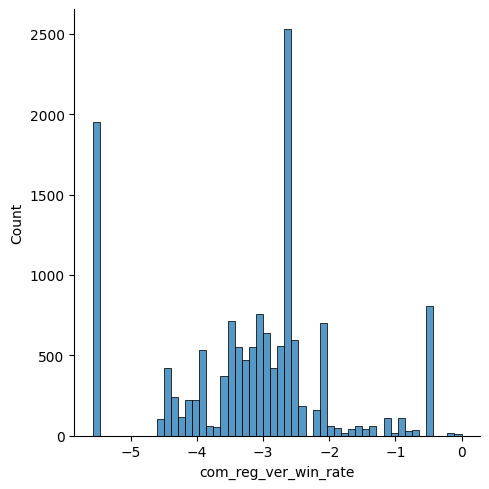

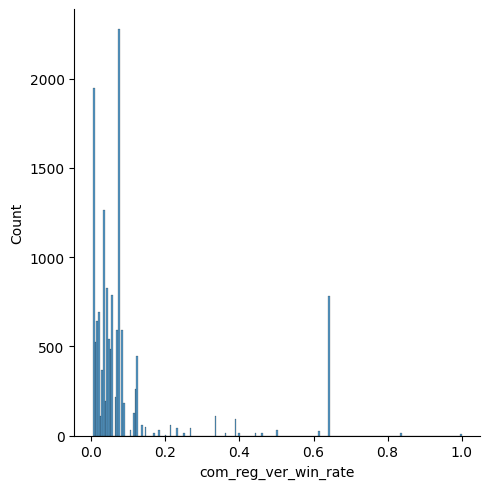

In [ ]:
sns.displot(np.log(df_train['com_reg_ver_win_rate']));
sns.displot(df_train['com_reg_ver_win_rate']); 

In [ ]:
#LogisticRegression (com_reg_ver_win_rate, it_strategic_ver >> is_converted)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# data load
data = pd.read_csv("train.csv")

# Fill missing values
data['it_strategic_ver'].fillna(0, inplace=True)
data['id_strategic_ver'].fillna(0, inplace=True)
data['idit_strategic_ver'].fillna(0, inplace=True)
data['com_reg_ver_win_rate'].fillna(data['com_reg_ver_win_rate'].median(), inplace=True)


# Feature, Target
X = data[['it_strategic_ver', 'id_strategic_ver', 'idit_strategic_ver', 'com_reg_ver_win_rate']]
y = data['is_converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Coefficients
print('Coefficients: \n', model.coef_)


Coefficients: 
 [[-1.4256623   0.81103441 -0.61462788  3.85752515]]


In [ ]:
# Load the data
data2 = pd.read_csv('train.csv')

# Handle missing values
data2['it_strategic_ver'].fillna(0, inplace=True)  # Fill missing values in 'it_strategic_ver' with 0
data2['com_reg_ver_win_rate'].fillna(data2['com_reg_ver_win_rate'].mean(), inplace=True)  # Fill missing values in 'com_reg_ver_win_rate' with the column's mean

# Calculate Pearson correlation coefficient
correlation = data2[['it_strategic_ver', 'com_reg_ver_win_rate']].corr()

print(correlation)  # Print the correlation matrix

                      it_strategic_ver  com_reg_ver_win_rate
it_strategic_ver              1.000000             -0.015597
com_reg_ver_win_rate         -0.015597              1.000000


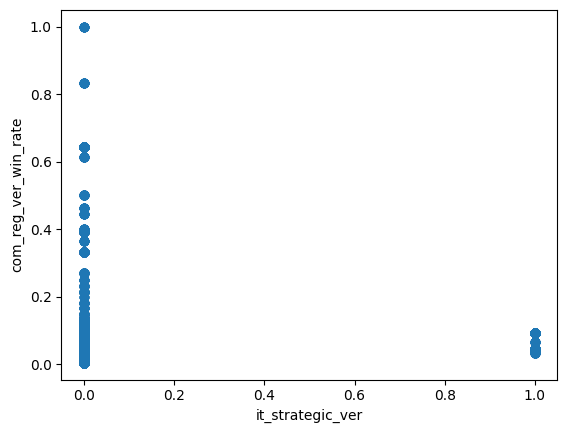

In [ ]:
data = pd.read_csv('train.csv')

data['it_strategic_ver'].fillna(0, inplace=True)
data['com_reg_ver_win_rate'].fillna(data['com_reg_ver_win_rate'].mean(), inplace=True)

plt.scatter(data['it_strategic_ver'], data['com_reg_ver_win_rate'])
plt.xlabel('it_strategic_ver')
plt.ylabel('com_reg_ver_win_rate')
plt.show()

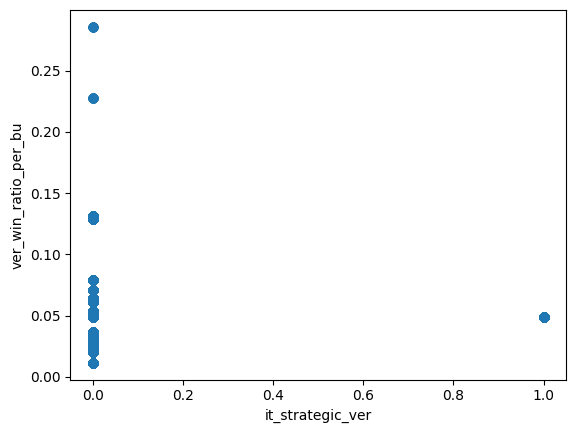

In [ ]:
data = pd.read_csv('train.csv')

data['it_strategic_ver'].fillna(0, inplace=True)
data['ver_win_ratio_per_bu'].fillna(data['ver_win_ratio_per_bu'].mean(), inplace=True)

plt.scatter(data['it_strategic_ver'], data['ver_win_ratio_per_bu'])
plt.xlabel('it_strategic_ver')
plt.ylabel('ver_win_ratio_per_bu')
plt.show()

Preprocessing

Label Encoding

In [ ]:
def label_encoding(series: pd.Series) -> pd.Series:

    my_dict = {}

    # Convert the series to string
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [ ]:
# Label encoding
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

df_all = pd.concat([df_train[label_columns], df_test[label_columns]])

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

In [14]:
for col in label_columns:  
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]

In [15]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train.drop("is_converted", axis=1),
    df_train["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

Model Training

In [16]:
model = DecisionTreeClassifier()

In [17]:
model.fit(x_train.fillna(0), y_train)

DecisionTreeClassifier()

In [18]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [19]:
pred = model.predict(x_val.fillna(0))
get_clf_eval(y_val, pred)

오차행렬:
 [[  735   212]
 [  264 10649]]

정확도: 0.9599
정밀도: 0.7357
재현율: 0.7761
F1: 0.7554
